First we need to load a dataset. In this tutorial  we will tackle Fashion MNIST datasets. This datasets contains 70,000 grayscale images 28 x 28 pixels each with 10 classes.But the images represent fashion items  rather than handwritten digits, so each class is more diverse, and the problem truns out to be significantly more challenging than MNIST.
For Example, a simple linear model model reaches about 92% accuracy on MNIST, but only about 83% on Fashion MNIST.

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load datasets from keras

In [2]:
datasets = tf.keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = datasets.load_data()

4423680/4422102 [==============================] - 0s 0us/step


When Loading MNIST or fashion MNIST using keras rather than sklearn, one <b style="color:red"> Important </b> difference is that every images is represented as a 28x28 array rather than a 1D array of size 784. Moreover, the pixel intensities are represented as integers (from 0 to 255 ) rather than floats (from 0.0- to 255.0). Let's take a look at the shape adna data type of the trining set:

In [3]:
print('Shape Of the Datasets: ')
print('X - Train Datasets Shape : \t\t', x_train_full.shape)
print('X - Test Datasets Shape : \t\t', x_test.shape)
print()
print('Y - Train Datasets Shape : \t\t', y_train_full.shape)
print('Y - Test Datasets Shape : \t\t', y_test.shape)
print('')
print('Data Type of the Datasets: ')
print('X - Train Datasets data - type : \t', x_train_full.dtype)
print('X - Test Datasets data - type : \t', x_test.dtype)
print()
print('Y - Train Datasets data - type : \t', y_train_full.dtype)
print('Y - Test Datasets data - type : \t', y_test.dtype)

Shape Of the Datasets: 
X - Train Datasets Shape : 		 (60000, 28, 28)
X - Test Datasets Shape : 		 (10000, 28, 28)

Y - Train Datasets Shape : 		 (60000,)
Y - Test Datasets Shape : 		 (10000,)

Data Type of the Datasets: 
X - Train Datasets data - type : 	 uint8
X - Test Datasets data - type : 	 uint8

Y - Train Datasets data - type : 	 uint8
Y - Test Datasets data - type : 	 uint8


Note that the dataset us already split into <b style="color:blue">training datasets</b> and <b style="color:blue">test datasets</b>, but there is no <b style="color:blue">validation set</b>, so we'll create one now. Additonally,science we are gogong to train the neural network using Gradient Descent, we must scale the input features. For simplicty, we'll scale the pixel intensities down to the 0-1 range by dividing them by 255.0 ( <b style="color:red"> This also converts them to floats </b>)

In [4]:
x_validation, x_train = x_train_full[:5000] /255.0, x_train_full[5000:]/255.0
y_validation, y_train = y_train_full[:5000] , y_train_full[5000:]

With MNIST, when the label is equal to 5, it means that the image represents the handwritten digit 5.

# Class Names 

In [5]:
class_names= ['T-shirt/top', 'Trouser', 'Pullover',
             'Dress', 'Coat', 'Sandal', 'Shirt',
             'Sneaker','Bag', 'Ankel boot']

In [6]:
class_names[y_train[0]]

'Coat'

# Creating the Model

In [7]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = [28, 28]),
                            tf.keras.layers.Dense(300, activation = 'relu'),
                            tf.keras.layers.Dense(100, activation = 'relu'),
                            tf.keras.layers.Dense(10, activation = 'softmax')
                            ])

# Let's explains this above code line by line.
* The first line creates a Sequential model. This is the simplest kind of Keras
model for neural networks that are just composed of a single stack of layers connected
sequentially. This is called the Sequential API.
* Next, we build the first layer and add it to the model. It is a Flatten layer whose
role is to convert each input image into a 1D array: if it receives input data X, it
computes X.reshape(-1, 1). This layer does not have any parameters; it is just
there to do some simple preprocessing. Since it is the first layer in the model, you
should specify the input_shape, which doesn’t include the batch size, only the
shape of the instances. Alternatively, you could add a keras.layers.InputLayer
as the first layer, setting input_shape=[28,28].
* Next we add a Dense hidden layer with 300 neurons. It will use the ReLU activation
function. Each Dense layer manages its own weight matrix, containing all the
connection weights between the neurons and their inputs. It also manages a vector
of bias terms (one per neuron). When it receives some input data, it use this equation (
<b style="color:blue">Computing the outputs of a fully connected layer
hW, b X = ϕ XW + b</b>)
* Then we add a second Dense hidden layer with 100 neurons, also using the ReLU
activation function.
* Finally, we add a Dense output layer with 10 neurons (one per class), using the
softmax activation function (because the classes are exclusive).


# Relu Activation
Specifying activation="relu" is equivalent to specifying activa
tion=keras.activations.relu. Other activation functions are
available in the keras.activations package, we will use many of
them in this book. See https://keras.io/activations/ for the full list.

# Summary Method
The model’s summary() method displays all the model’s layers,14 including each layer’s
name (which is automatically generated unless you set it when creating the layer), its
output shape (None means the batch size can be anything), and its number of parameters.
The summary ends with the total number of parameters, including trainable and
non-trainable parameters

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


<b style="color:red">Note that Dense layers often have a lot of parameters. For example, the first hidden
layer has 784 × 300 connection weights, plus 300 bias terms, which adds up to
235,500 parameters! This gives the model quite a lot of flexibility to fit the training
data, but it also means that the model runs the risk of overfitting, especially when you
do not have a lot of training data. We will come back to this later.</b>

In [9]:
model.layers

In [10]:
hidden1 = model.layers[1]

In [11]:
hidden1.name

'dense'

In [12]:
model.get_layer('dense') is hidden1

True

All the parameters of a layer can be accessed using its get_weights() and
set_weights() methods. For a Dense layer, this includes both the connection weights
and the bias terms:

In [13]:
weights, biases = hidden1.get_weights()

# Weights

In [14]:
weights

array([[ 0.01928864,  0.0602407 ,  0.03392207, ..., -0.0484309 ,
        -0.03214464,  0.0163103 ],
       [ 0.05048089,  0.04255469,  0.00276794, ..., -0.03192579,
         0.04085576, -0.02427865],
       [-0.03102624, -0.01018259, -0.02119242, ..., -0.0404215 ,
         0.03046191, -0.03926641],
       ...,
       [ 0.05088267,  0.0271789 , -0.05350785, ...,  0.01465806,
        -0.05476397, -0.02783053],
       [-0.05576121,  0.00451139,  0.05212598, ...,  0.01938473,
        -0.05459924,  0.01647294],
       [-0.0471751 ,  0.05614612, -0.03442268, ...,  0.01633791,
        -0.06903919,  0.05556297]], dtype=float32)

In [15]:
weights.shape

(784, 300)

# Biases

In [16]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [17]:
biases.shape

(300,)

<b style="color:red">Notice that the Dense layer initialized the connection weights randomly (which is
needed to break symmetry, as we discussed earlier), and the biases were initialized to
zeros, which is fine. If you ever want to use a different initialization method, you can
set kernel_initializer (kernel is another name for the matrix of connection weights) or bias_initializer when creating the layer. We will discuss initializers
further in Chapter 11, but if you want the full list, see https://keras.io/initializers/. </b>

In [18]:
model.compile(loss=tf.losses.sparse_categorical_crossentropy,
             optimizer = 'sgd',
             metrics=['accuracy'])

Using loss="sparse_categorical_crossentropy" is equivalent to
using loss=keras.losses.sparse_categorical_crossentropy.
Similarly, specifying optimizer="sgd" is equivalent to specifying
optimizer=keras.optimizers.SGD(), and metrics=["accuracy"]
is equivalent to metrics=[keras.metrics.sparse_categori
cal_accuracy] (when using this loss). We will use many other losses,
optimizers, and metrics in this book; for the full lists, see
https://keras.io/losses, https://keras.io/optimizers, and https://
keras.io/metrics.

# Explation 
This code requires some explanation. First, we use the "sparse_categorical_cross
entropy" loss because we have sparse labels (i.e., for each instance, there is just a target
class index, from 0 to 9 in this case), and the classes are exclusive. If instead we
had one target probability per class for each instance (such as one-hot vectors, e.g.
[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.] to represent class 3), then we would
need to use the "categorical_crossentropy" loss instead. If we were doing binary
classification (with one or more binary labels), then we would use the "sigmoid" (i.e.,
logistic) activation function in the output layer instead of the "softmax" activation
function, and we would use the "binary_crossentropy" loss.

If you want to convert sparse labels (i.e., class indices) to one-hot
vector labels, use the keras.utils.to_categorical() function. To
go the other way round, use the np.argmax() function with
axis=1.

Regarding the optimizer, "sgd" means that we will train the model using simple Stochastic
Gradient Descent. In other words, Keras will perform the backpropagation
algorithm described earlier (i.e., reverse-mode autodiff plus Gradient Descent). We
will discuss more efficient optimizers in Chapter 11 (they improve the Gradient
Descent part, not the autodiff).

When using the SGD optimizer, it is important to tune the learning
rate. So, you will generally want to use optimizer=keras.optimiz
ers.SGD(lr=???) to set the learning rate, rather than opti
mizer="sgd", which defaults to lr=0.01.

Finally, since this is a classifier, it’s useful to measure its "accuracy" during training
and evaluation.

# Training and Evaluating the Model

In [19]:
history  = model.fit(x_train, y_train, epochs=30,
                    validation_data=(x_validation, y_validation))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7236 - accuracy: 0.7625 - val_loss: 0.5061 - val_accuracy: 0.8288
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4876 - accuracy: 0.8301 - val_loss: 0.4843 - val_accuracy: 0.8252
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4445 - accuracy: 0.8434 - val_loss: 0.4392 - val_accuracy: 0.8454
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4155 - accuracy: 0.8539 - val_loss: 0.4077 - val_accuracy: 0.8606
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3970 - accuracy: 0.8614 - val_loss: 0.4359 - val_accuracy: 0.8466
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3797 - accuracy: 0.8661 - val_loss: 0.3983 - val_accuracy: 0.8628
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3667 - accuracy: 0.8703 - val_loss: 0.3878 - val_accuracy:

We pass it the input features (X_train) and the target classes (y_train), as well as the
number of epochs to train (or else it would default to just 1, which would definitely
not be enough to converge to a good solution). We also pass a validation set (this is
optional). Keras will measure the loss and the extra metrics on this set at the end of
each epoch, which is very useful to see how well the model really performs. If the performance
on the training set is much better than on the validation set, 
your model is probably overfitting the training set (or there is a bug, such as a data mismatch
between the training set and the validation set).
And that’s it! The neural network is trained.15 At each epoch during training, Keras
displays the number of instances processed so far (along with a progress bar), the
mean training time per sample, and the loss and accuracy (or any other extra metrics
you asked for) on both the training set and the validation set. You can see that the
training loss went down, which is a good sign, and the validation accuracy reached
89.26% after 30 epochs. That’s not too far from the training accuracy, so there does
not seem to be much overfitting going on.

<b style="color:blue"> Instead of passing a validation set using the validation_data
argument, you could set validation_split to the ratio of the
training set that you want Keras to use for validation. For example,
validation_split=0.1 tells Keras to use the last 10% of the data
(before shuffling) for validation. </b>

If the training set was very skewed, with some classes being overrepresented and others
underrepresented, it would be useful to set the class_weight argument when
calling the fit() method, which would give a larger weight to underrepresented
classes and a lower weight to overrepresented classes. These weights would be used by
Keras when computing the loss. If you need per-instance weights, set the sam
ple_weight argument (if both class_weight and sample_weight are provided, Keras
multiplies them). Per-instance weights could be useful if some instances were labeled
by experts while others were labeled using a crowdsourcing platform: you might want
to give more weight to the former. You can also provide sample weights (but not class
weights) for the validation set by adding them as a third item in the validation_data
tuple.

# Plot the model

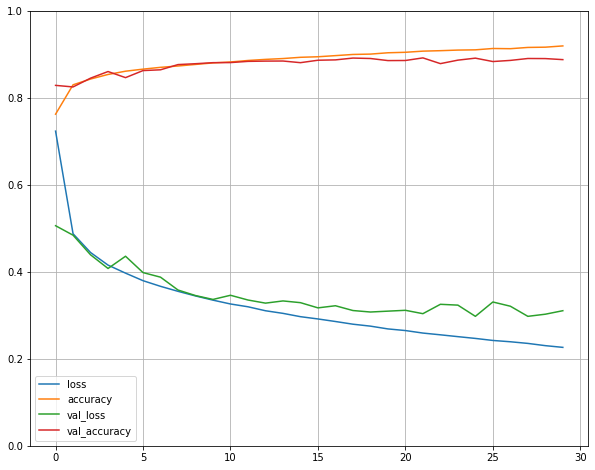

In [20]:
pd.DataFrame(history.history).plot(figsize = (10, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Evaluating the Model


In [21]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 77.8259 - accuracy: 0.8263


[77.82589721679688, 0.8263000249862671]

# Using the model to Predictions

In [22]:
x_new = x_test[:3]
y_probabilities = model.predict(x_new)
y_probabilities.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [23]:
y_predict = model.predict_classes(x_new)
y_predict

array([9, 2, 1])

In [24]:
np.array(class_names)[y_predict]

array(['Ankel boot', 'Pullover', 'Trouser'], dtype='<U11')

Here, the classifier actually classified all three images correctly.

In [25]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [26]:
np.array(class_names)[y_new]

array(['Ankel boot', 'Pullover', 'Trouser'], dtype='<U11')